# Project Title: Sentiment analysis for marketing

### Submitted by: GoppyKrishna M

**Dataset :** [Twitter US Airline Sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)


### **Data Preparation:**


### Import necessary libraries


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset


In [19]:
dataset = pd.read_csv("Tweets.csv")
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Eliminating Null Values and Unnecessary Columns

Find the number of null value rows in each column of the dataset.


In [20]:
print("Tweets.csv : ")
print(f"Shape of Dataset : {dataset.shape}")

print("Null Values in Each Field :")
print(dataset.isna().sum())

Tweets.csv : 
Shape of Dataset : (14640, 15)
Null Values in Each Field :
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Find the percentage of null value rows in each column of the dataset


In [21]:
print("Percentage Null Values in Each Field : ")
((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2)

Percentage Null Values in Each Field : 


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

Eliminating columns with more than 90% of Null values as these will give very little information


In [22]:
del dataset["tweet_coord"]
del dataset["airline_sentiment_gold"]
del dataset["negativereason_gold"]
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Visualize the Data Distribution

Preparing a list of all the Airlines and Sentiments in the dataset


In [23]:
AIRLINES = dataset["airline"].unique().tolist()
AIRLINES.sort()

airlines = [airline.lower() for airline in AIRLINES]

SENTIMENTS = dataset["airline_sentiment"].unique().tolist()
SENTIMENTS.sort(reverse=True)

print(AIRLINES)
print(SENTIMENTS)

['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
['positive', 'neutral', 'negative']


Count the number of tweets about each Airline


In [24]:
tweet_count = (
    dataset.groupby("airline")["airline_sentiment"].count().sort_values(ascending=False)
)

print(tweet_count)

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


Plot a Pie chart for number of tweets about each Airline


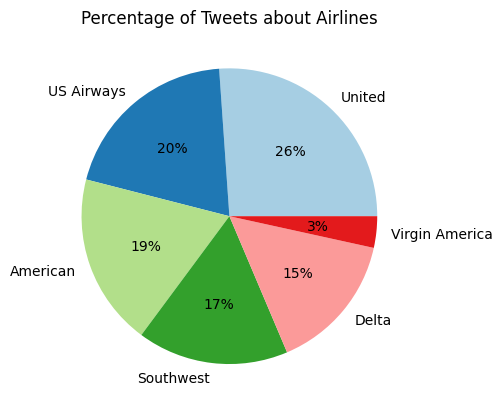

In [25]:
colors = sns.color_palette("Paired")[0 : len(AIRLINES) + 1]

plt.title("Percentage of Tweets about Airlines")

plt.pie(
    tweet_count.values,
    labels=tweet_count.index.tolist(),
    colors=colors,
    autopct="%.0f%%",
)

plt.show()

Plot Bar graphs to visualize the distribution of sentiment for each Airline


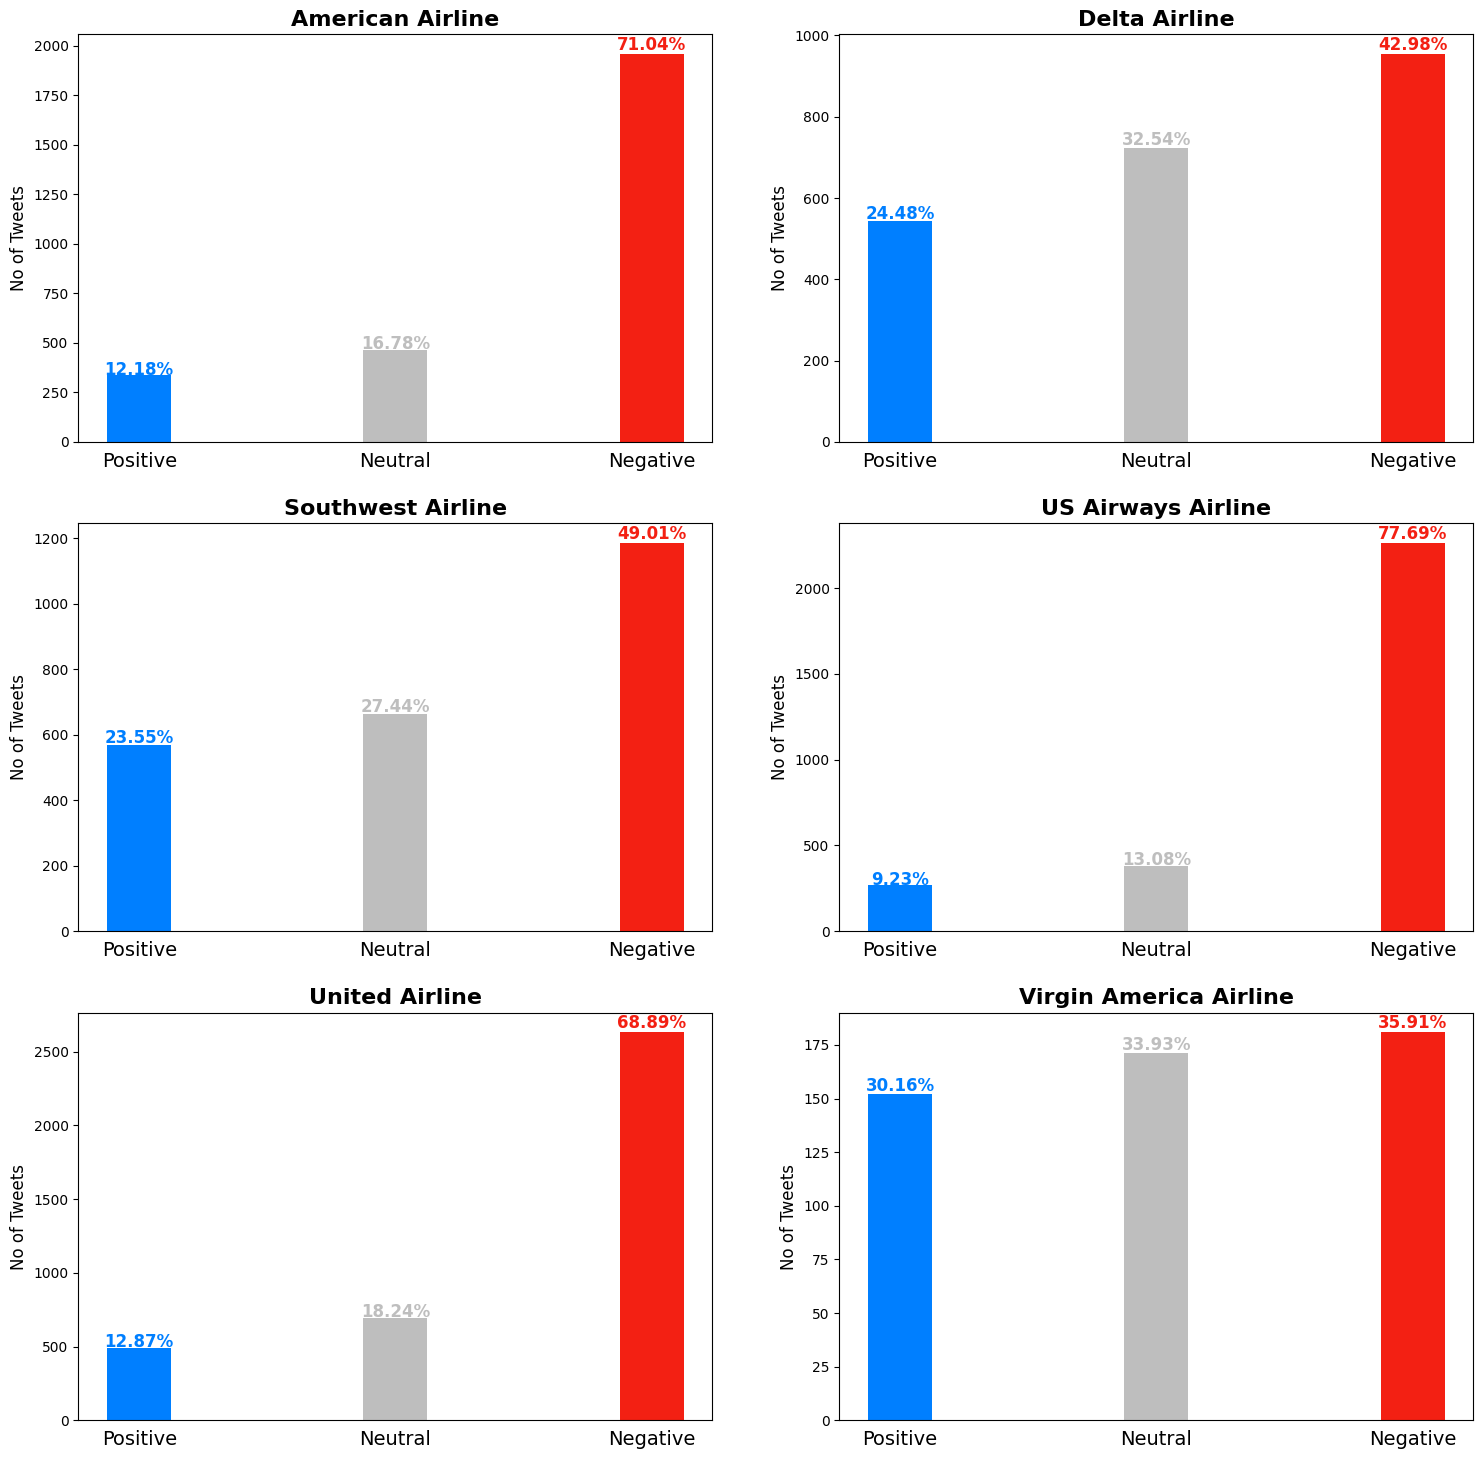

In [26]:
plt.figure(1, figsize=(18, 18))
for i in AIRLINES:
    indices = AIRLINES.index(i)
    plt.subplot(3, 2, indices + 1)

    new_df = dataset[dataset["airline"] == i]
    count = new_df["airline_sentiment"].value_counts().sort_index(ascending=False)

    Index = [1, 2, 3]
    colors = ["#007FFF", "#BEBEBE", "#F32013"]

    graph = plt.bar(Index, count, color=colors, width=0.25)

    plt.xticks(Index, [i.title() for i in SENTIMENTS], fontdict={"size": 14})
    plt.tick_params(bottom=False)
    plt.ylabel("No of Tweets", fontdict={"size": 12})
    plt.title(i + " Airline", fontdict={"size": 16}, weight="bold")

    j = 0

    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(
            x + width / 2,
            y + height * 1.01,
            str(round((count[j] / count.sum()) * 100, 2)) + "%",
            ha="center",
            weight="bold",
            fontdict={"color": colors[j], "size": 12},
        )

        j += 1

plt.show()

Here we are preparing two types of Dataset:

- Heavily Processed -> For Machine Learning Models
- Lightly Processed -> For Deep Learning Models

Dataset for Deep Learning models are lightly processed as Deep Learning Models such as BERT and RoBERTa are capable of gaining more insights from lightly processed datasets, than they do in Heavily Processed ones.

### Data Preprocessing


**Import the dataset**


In [ ]:
dataset = pd.read_csv("Tweets.csv")
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Eliminating Null Values and Unnecessary Columns**

Find the number of null value rows in each column of the dataset.


In [ ]:
print("Tweets.csv : ")
print(f"Shape of Dataset : {dataset.shape}")

print("Null Values in Each Field :")
print(dataset.isna().sum())

Tweets.csv : 
Shape of Dataset : (14640, 15)
Null Values in Each Field :
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Find the percentage of null value rows in each column of the dataset


In [ ]:
print("Percentage Null Values in Each Field : ")
((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2)

Percentage Null Values in Each Field : 


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

Eliminating columns with more than 90% of Null values as these will give very little information


In [ ]:
del dataset["tweet_coord"]
del dataset["airline_sentiment_gold"]
del dataset["negativereason_gold"]
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Import necessary libraries for processing text tweets**


In [ ]:
import demoji

import unicodedata
import html
import string
import re

demoji.download_codes()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20132\3460003666.py:8: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Declare necessary constants


In [ ]:
AIRLINES = dataset["airline"].unique().tolist()
AIRLINES.sort()

airlines = [airline.lower() for airline in AIRLINES]

SENTIMENTS = dataset["airline_sentiment"].unique().tolist()
SENTIMENTS.sort(reverse=True)

print(AIRLINES)
print(SENTIMENTS)

['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
['positive', 'neutral', 'negative']


Declare a list Stop words to be removed from the tweets in order to find context based stop words


In [ ]:
from nltk.corpus import stopwords

# STOP_WORDS_P = list(get_stop_words("en"))  # About 900 stopwords
STOP_WORDS_P = []
nltk_words = list(stopwords.words("english"))  # About 150 stopwords
STOP_WORDS_P.extend(nltk_words)

STOP_WORDS_P.extend(["i", "u", "amp", "us"])

STOP_WORDS = []

for stop_word in STOP_WORDS_P:
    temp_word = ""
    for char in stop_word:
        if char not in string.punctuation:
            temp_word += char
    STOP_WORDS.append(temp_word)

print(STOP_WORDS_P)
print(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Declare a dictionary of Text Emoticons which are commonly used in tweets to express emotions

-   Here we've declared about a 100 of text emoticons which can be extended if needed.


In [ ]:
text_emoticons = {
    ":)": "smile",
    "=)": "smile",
    "<3": "smile",
    "<3": "heart",
    ":(": "sad",
    ":-)": "smile",
    ":)": "smile",
    ":-]": "smile",
    ":]": "smile",
    ":->": "smile",
    ":>": "smile",
    "8-)": "smile",
    "8)": "smile",
    ":-}": "smile",
    ":}": "smile",
    ":o)": "smile",
    ":c)": "smile",
    ":^)": "smile",
    "=]": "smile",
    "=)": "smile",
    ":-D": "laugh",
    ":D": "laugh",
    "8-D": "laugh",
    "8D": "laugh",
    "=D": "laugh",
    "=3": "laugh",
    "B^D": "laugh",
    "c:": "laugh",
    "C:": "laugh",
    "x-D": "laugh",
    "xD": "laugh",
    "X-D": "laugh",
    "XD": "laugh",
    ":-))": "very happy",
    ":-(": "sad",
    ":(": "sad",
    ":-c": "sad",
    ":c": "sad",
    ":-<": "sad",
    ":<": "sad",
    ":-[": "sad",
    ":[": "sad",
    ":-||": "sad",
    ":{": "sad",
    ":@": "sad",
    ":(": "sad",
    ";(": "sad",
    ":-c": "sad",
    ":'-(": "crying",
    ":'(": "crying",
    ":=(": "crying",
    ":'-)": "tears of happiness",
    ":')": "tears of happiness",
    ':"D': "tears of happiness",
    ">:(": "angry",
    ">:[": "angry",
    ":-O": "shock",
    ":O": "shock",
    ":-o": "shock",
    ":o": "shock",
    ":-0": "shock",
    ":0": "shock",
    "8-0": "shock",
    ">:O": "shock",
    "=O": "shock",
    "=o": "shock",
    "=0": "shock",
    ":c": "shock",
    ":-<": "shock",
    ":<": "shock",
    ":-[": "shock",
    ":[": "shock",
    ":-||": "shock",
    ":{": "shock",
    ":@": "shock",
    ":(": "shock",
    ";(": "shock",
    ">:3": "smile",
    ":-*": "kiss",
    ":*": "kiss",
    ":x": "kiss",
    ":-|": "no expression",
    ":|": "no expression",
    "%-)": "confused",
    "%)": "confused",
    "</3": "broken heart",
    "<\\3": "broken heart",
    "@>-->--": "rose",
    "@}-;-'---": "rose",
    "@}->--": "rose",
    "@};-": "rose",
    "(>_<)": "trouble",
    "(>_<)>": "trouble",
    "(>w<)": "trouble",
    "^_^": "joyful",
    "(°o°)": "joyful",
    "(^_^)/": "joyful",
    "(^O^)/": "joyful",
    "(^o^)/": "joyful",
    "(^^)/": "joyful",
    "(≧∇≦)/": "joyful",
    "(/◕ヮ◕)/": "joyful",
    "(^o^)丿": "joyful",
    "∩(·ω·)∩": "joyful",
    "(·ω·)": "joyful",
    "^ω^": "joyful",
    "(ー_ー)!!": "shame",
    "(-.-)": "shame",
    "(-_-)": "shame",
    "(一一)": "shame",
    "(;一_一)": "shame",
}

Context based Stop words

Create a function that generates stop words based on the context.

-   First take top 25 most frequent words form all the N Sentiments
-   Combine them into a single list
-   Find the words that have repeated for N or more times
-   These words are context based stop words


In [ ]:
from wordcloud import WordCloud
from collections import Counter


def get_context_stop_words(dataset, sentiment_col, text_col, sentiments):
    top25_words = []

    for sentiment in sentiments:
        new_df = dataset[dataset[sentiment_col] == sentiment]
        words = " ".join(new_df[text_col])
        cleaned_word = " ".join([word for word in words.split()])
        wordcloud = WordCloud(
            stopwords=STOP_WORDS, background_color="black", width=3000, height=2500
        ).generate(cleaned_word)

        top25_words.extend(list(wordcloud.words_.keys())[0:25])

    count = Counter(top25_words)

    context_stop_words = [word.lower() for word, freq in count.items() if freq >= 3]

    return context_stop_words

Declare a function to handle negation in the statements

For example this function converts:

`This is not good -> This is bad`

`It wasn't bad -> It was good`


In [ ]:
from nltk.corpus import wordnet


def Negation(words):
    temp = int(0)
    for i in range(len(words)):
        if words[i - 1] in ["not", "n't"]:
            antonyms = []
            for syn in wordnet.synsets(words[i]):
                syns = wordnet.synsets(words[i])
                w1 = syns[0].name()
                temp = 0
                for l in syn.lemmas():
                    if l.antonyms():
                        antonyms.append(l.antonyms()[0].name())
                max_dissimilarity = 0
                for ant in antonyms:
                    syns = wordnet.synsets(ant)
                    w2 = syns[0].name()
                    syns = wordnet.synsets(words[i])
                    w1 = syns[0].name()
                    word1 = wordnet.synset(w1)
                    word2 = wordnet.synset(w2)
                    if isinstance(word1.wup_similarity(word2), float) or isinstance(
                        word1.wup_similarity(word2), int
                    ):
                        temp = 1 - word1.wup_similarity(word2)
                    if temp > max_dissimilarity:
                        max_dissimilarity = temp
                        antonym_max = ant
                        words[i] = antonym_max
                        words[i - 1] = ""
    while "" in words:
        words.remove("")
    return words

**Process the Tweets (cleaning)**

1. Convert 'html entities' to respective Symbols and texts.
   `Eg: &lt; -> <`
2. Decode all the Emoji and Text Emoticons used in the Tweets.
   `Eg: 🙂 -> slightly smiling face, :) -> smile`
3. Eliminate the '@ mentions', '# hashtags' about the Airlines and external links.
4. Delete all the punctuation marks and digits used in the Tweets.
5. Tokenize the words in the Tweets, tag them with respective Parts of Speech and Lemmatize them according to their Parts of Speech tag.
   `Eg: loving -> love, ate -> eat`
6. Remove all the Context based StopWords in the Tweets.
   `Eg: flight, fly, go`
7. Finally combine the Tweets and add them to the dataset.


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

wnl = WordNetLemmatizer()


def clean_tweets(tweets):
    cleaned_tweets = []

    for tweet in tweets.values:
        cleaned_words = []

        # html Entities decoding
        tweet = html.unescape(tweet)

        # Emoji decoding

        emoji_dict = demoji.findall(tweet) | text_emoticons

        if emoji_dict:
            for emoji in emoji_dict.keys():
                tweet = tweet.replace(emoji, " " + emoji_dict[emoji] + " ")

        words = [word.lower().strip() for word in tweet.split()]

        # #, @, http link, punctuation removal

        for word in words:
            regex_cond = (
                re.match(r"@.+", word),
                re.match(f"#({'|'.join(airlines)}).*", word),
                re.match(r"http.?:.*", word),
            )

            if any(regex_cond):
                words.remove(word)

        cleaned_words = Negation(words)

        tweet = " ".join(cleaned_words)

        words = []

        for word, tag in pos_tag(word_tokenize(tweet)):
            w_tags = tag[0].lower()
            w_tags = w_tags if w_tags in ["a", "r", "n", "v"] else None
            if not w_tags:
                lemma = word
            else:
                lemma = wnl.lemmatize(word, w_tags)
            words.append(lemma)
        punctuation = string.punctuation
        for word in words:
            if re.match(f"[{punctuation}]?[0-9]+", word):
                words.remove(word)

        cleaned_words = []
        for word in words:
            for char in word:
                if unicodedata.category(char).startswith("P") or char in punctuation:
                    word = word.replace(char, "")

            cleaned_words.append(word)

        tweet = " ".join(cleaned_words)

        cleaned_words = [
            word.lower().strip()
            for word in tweet.split()
            if word.lower() not in ["t", "s", "re", "nt", "d", "ve"]
        ]

        tweet = " ".join(cleaned_words)

        # Digits and words with digits removal
        tweet = re.sub(r"\w*\D*\d\w*", "", tweet)

        cleaned_tweets.append(tweet.strip())

    return cleaned_tweets


def remove_context_stop_words(tweets, context_stop_words):
    cleaned_tweets = []

    for tweet in tweets.values:
        cleaned_words = [
            word.lower().strip()
            for word in tweet.split()
            if word.lower() not in context_stop_words
        ]

        cleaned_tweet = " ".join(cleaned_words)

        cleaned_tweets.append(cleaned_tweet.strip())

    return cleaned_tweets


tweets = dataset["text"]

cleaned_tweets = clean_tweets(tweets)

dataset["text"] = cleaned_tweets

CONTEXT_STOP_WORDS = get_context_stop_words(
    dataset, "airline_sentiment", "text", SENTIMENTS
)

print("Context SW :", CONTEXT_STOP_WORDS)

cleaned_tweets = remove_context_stop_words(dataset["text"], CONTEXT_STOP_WORDS)

for i in range(10):
    print("___________________________________")
    print("Before Processing : " + tweets[i])
    print("After  Processing : " + cleaned_tweets[i])

dataset["text"] = cleaned_tweets

Context SW : ['thank', 'flight', 'get', 'make', 'fly', 'help', 'time', 'go']
___________________________________
Before Processing : @VirginAmerica What @dhepburn said.
After  Processing : what say
___________________________________
Before Processing : @VirginAmerica plus you've added commercials to the experience... tacky.
After  Processing : plus you add commercial to the experience tacky
___________________________________
Before Processing : @VirginAmerica I didn't today... Must mean I need to take another trip!
After  Processing : i do today must mean i need to take another trip
___________________________________
Before Processing : @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
After  Processing : it really aggressive to blast obnoxious entertainment in your guest face they have little recourse
___________________________________
Before Processing : @VirginAmerica and it's a really big bad thing abo

**Visualize Processed Tweets**

-   Create Word-clouds to visualize the processed tweets based on the Sentiments
-   In a word cloud, bigger the words are, more frequent they appear in the processed tweets


In [ ]:
from matplotlib import pyplot as plt


def create_wordCloud(dataset, sentiment_col, text_col, sentiments, stop_words):
    for sentiment in sentiments:
        new_df = dataset[dataset[sentiment_col] == sentiment]
        words = " ".join(new_df[text_col])
        cleaned_word = " ".join([word for word in words.split()])
        wordcloud = WordCloud(
            stopwords=stop_words,
            background_color="black",
            width=3000,
            height=2500,
        ).generate(cleaned_word)

        plt.figure(1, figsize=(12, 12))
        plt.title(f"{sentiment.title()} Words", fontdict={"size": 16}, weight="bold")
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

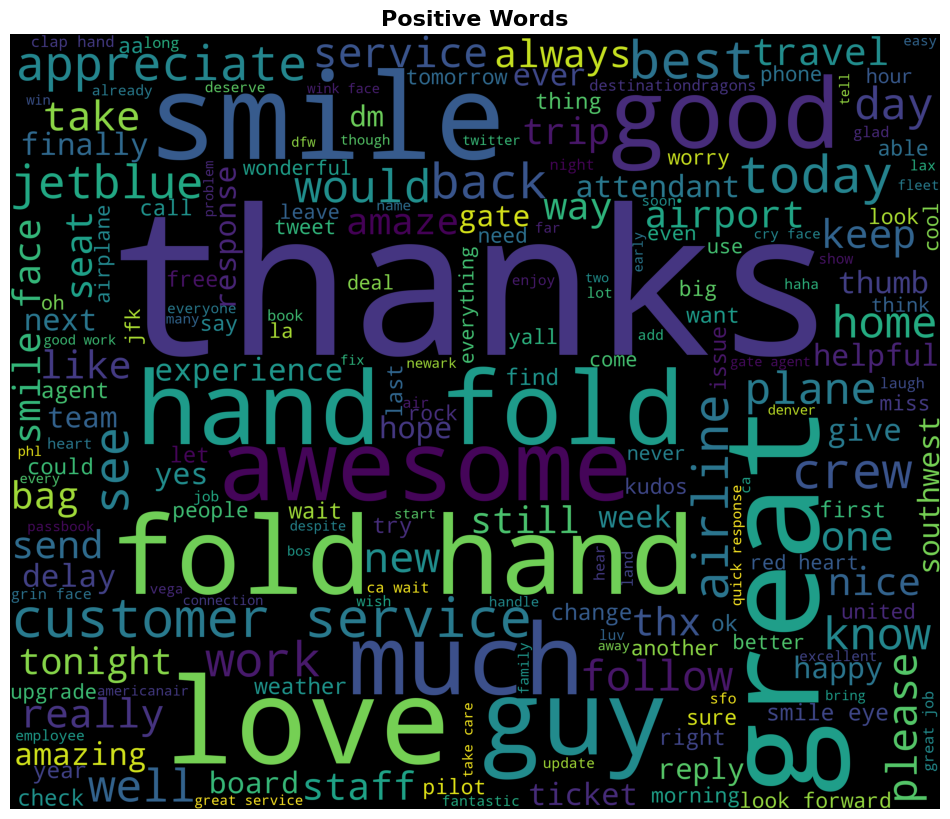

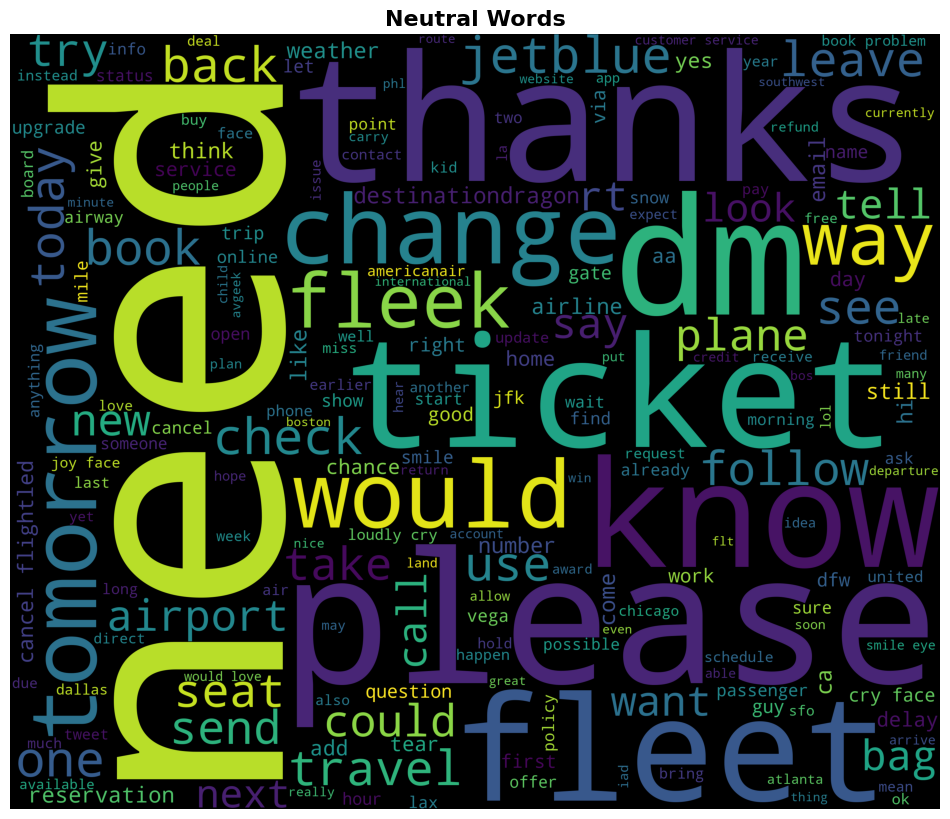

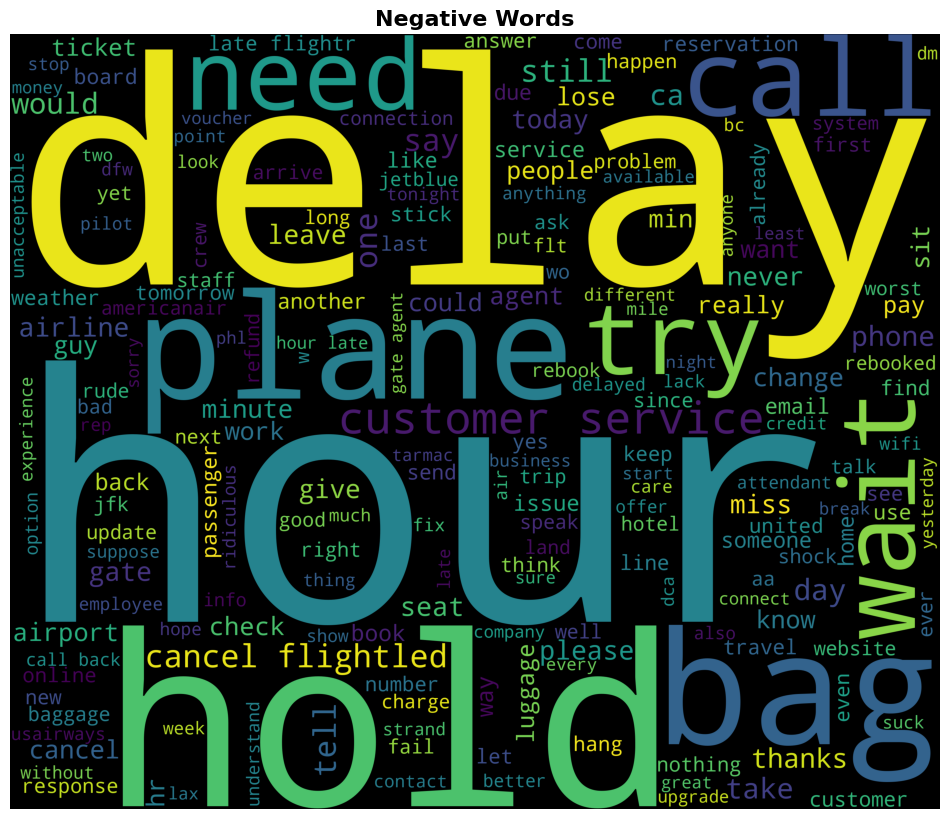

In [ ]:
create_wordCloud(
    dataset,
    "airline_sentiment",
    "text",
    SENTIMENTS,
    STOP_WORDS + STOP_WORDS_P + CONTEXT_STOP_WORDS,
)

**Save the Processed Tweets**

Save the Processed Tweets along with the Sentiment and Company Name (about whom the text/tweet is about) for training the AI model

-   Drop off other unnecessary columns for training.
-   Replace blank rows in Text with NaN and remove all the NaN rows.
-   Reset the index values after removing all the NaN rows.
-   Rename the columns as per convenience

Here we have saved the dataset into 'Tweets_Processed_lite.csv' file


In [ ]:
df = dataset.drop(
    columns=[
        col
        for col in dataset.columns
        if col not in ["airline", "airline_sentiment", "text"]
    ]
)

df["text"].replace("", np.nan, inplace=True)

df = df.dropna(how="any")
df.reset_index(drop=True, inplace=True)

df.rename(
    columns={"airline": "company", "airline_sentiment": "sentiment"}, inplace=True
)

df.to_csv("Tweets_Processed.csv")
df.head()

,sentiment,company,text
0,neutral,Virgin America,what say
1,positive,Virgin America,plus you add commercial to the experience tacky
2,neutral,Virgin America,i do today must mean i need to take another trip
3,negative,Virgin America,it really aggressive to blast obnoxious entert...
4,negative,Virgin America,and it a really big bad thing about it


### **Model Training**:


In this phase we will be training RoBERTa model for predicting the sentiment of the tweets.


### RoBERTa Model


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from torch.utils.data import DataLoader, Dataset

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding="max_length",
            return_tensors="pt",
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

In [ ]:
def label_encoding(labels):
    for i in range(len(labels)):
        if labels[i] == "negative":
            labels[i] = 0
        elif labels[i] == "positive":
            labels[i] = 2
        elif labels[i] == "neutral":
            labels[i] = 1

    return labels

In [ ]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("Tweets_Processed.csv")

# Split the dataset into train and test sets
texts_train, texts_test, labels_train, labels_test = train_test_split(
    dataset["text"].values, dataset["sentiment"].values, test_size=0.25, random_state=42
)

# Encode the labels
labels_train = label_encoding(labels_train)
labels_test = label_encoding(labels_test)

# Print the shapes of the train and test sets
print(texts_train)
print(texts_test.shape)
print(labels_train.shape)
print(labels_test.shape)

['please please please let my plane back to the gate so i can off as i will miss connection due to clt closing'
 'i will never be with ever again for check bag all under angrycustomer'
 'decision decision united we love for you to try our service we offer status match too kp'
 ... 'there an hour wait here for reflight book problem in line at omaha'
 'renoairport hi when do direct from houston to reno begin do see any day in march'
 'if you want to be helpful find us a seat do quote term and condition jetbluefail']
(3605,)
(10815,)
(3605,)


In [ ]:
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=3)

max_length = 128
train_dataset = SentimentDataset(texts_train, labels_train, tokenizer, max_length)
batch_size = 32
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
model.train()

cuda


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [ ]:
num_epochs = 10
losses = []
accuracies = []

for epoch in range(num_epochs):
    total_loss = 0
    total_correct = 0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += (outputs.logits.argmax(dim=1) == labels).sum().item()

    average_loss = total_loss / len(dataloader)
    accuracy = total_correct / len(dataloader.dataset) * 100

    losses.append(average_loss)
    accuracies.append(accuracy)

    print(
        f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%"
    )

model.save_pretrained("roberta_sentiment_model")

Epoch 1/10, Loss: 0.5861, Accuracy: 75.77%
Epoch 2/10, Loss: 0.3913, Accuracy: 84.87%
Epoch 3/10, Loss: 0.2971, Accuracy: 88.92%
Epoch 4/10, Loss: 0.2233, Accuracy: 91.82%
Epoch 5/10, Loss: 0.1605, Accuracy: 94.42%
Epoch 6/10, Loss: 0.1227, Accuracy: 95.87%
Epoch 7/10, Loss: 0.0934, Accuracy: 96.83%
Epoch 8/10, Loss: 0.0811, Accuracy: 97.32%
Epoch 9/10, Loss: 0.0607, Accuracy: 98.01%
Epoch 10/10, Loss: 0.0519, Accuracy: 98.24%


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

validation_dataset = SentimentDataset(texts_test, labels_test, tokenizer, max_length)
validation_dataloader = DataLoader(
    validation_dataset, batch_size=batch_size, shuffle=False
)

model.eval()

true_labels = []
predicted_labels = []

with torch.no_grad():
    for batch in validation_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted = torch.argmax(logits, dim=1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

confusion = confusion_matrix(true_labels, predicted_labels)


accuracy = accuracy_score(true_labels, predicted_labels) * 100
print(f"Accuracy: {accuracy:.2f}%")

model_accuracy["RoBERTa"] = round(accuracy * 100, 2)

Accuracy: 83.11%


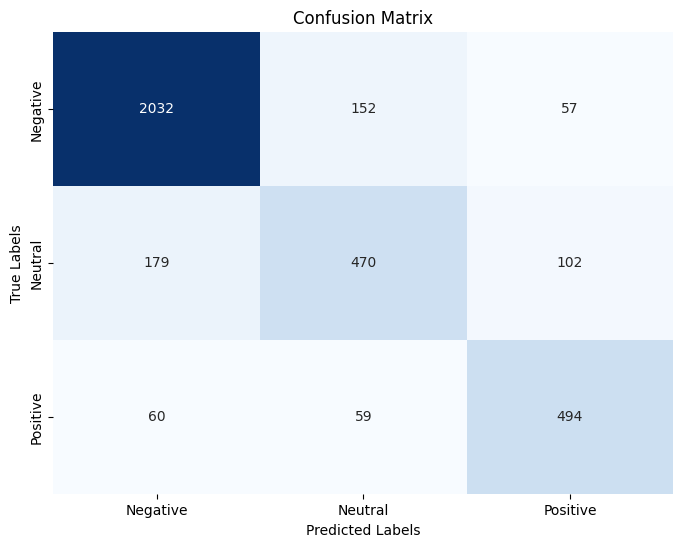

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
class_names = ["Negative", "Neutral", "Positive"]
plt.xticks(np.arange(3) + 0.5, class_names)
plt.yticks(np.arange(3) + 0.5, class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Testing with Custom Inputs

**Load the Trained RoBERTa model**


In [1]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained("roberta_sentiment_model")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

**Import necessary modules for processing input tweets**

`clean_tweets()` function is the same function used to clean tweets for lightly processed dataset

`decode_label()` function is used to decode the output of the Model to corresponding sentiment labels

```python
def decode_label(label):
    if label == 0:
        return "Negative"
    if label == 1:
        return "Neutral"
    if label == 2:
        return "Positive"

```


In [2]:
from testing_modules import clean_tweets, decode_label

**Clean the Inputs**


In [3]:
custom_inputs = [
    "Finally played through borderlands 3. The actual game play is great. Almost all guns feel fun, and I never once felt like I needed to grind. That story on the other hand.... All I will say Is that I'm very much so looking forward to the eventual cutscene skip :)",
    "All the Borderlands are damn rubbish",
    "Modern Warfare For $38, Borderlands 3 For $20, And More Great Game Deals (PS4, Xbox One, Switch) unsorted.co/modern-warfareâ€¦ https://t.co/2n68qoJKhU",
]

custom_inputs = clean_tweets(custom_inputs)

print("Cleaned : ", custom_inputs)

Cleaned :  ['finally play through borderland the actual game play be great almost all gun feel fun and i never once felt like i need to grind that story on the other hand all i will say be that i m very much so look forward to the eventual cutscene skip smile', 'all the borderland be damn rubbish', 'xbox one switch unsortedcomodernwarfareâ€¦']


**Encode Inputs for RoBERTa**


In [4]:
encoded_inputs = tokenizer(
    custom_inputs,
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding="max_length",
    return_tensors="pt",
)

encoded_inputs = encoded_inputs.to(model.device)

**Prediction Results**

-   First, make predictions with the model with the encoded inputs.
-   Then, decode them and print the results.


In [5]:
outputs = model(
    encoded_inputs["input_ids"], attention_mask=encoded_inputs["attention_mask"]
)
logits = outputs.logits

predicted_labels = torch.argmax(logits, dim=1)

for i in range(len(custom_inputs)):
    print(f"Predicted label for input {i + 1}: {decode_label(predicted_labels[i])}")

Predicted label for input 1: Positive
Predicted label for input 2: Negative
Predicted label for input 3: Neutral


### **Deployment**

- Now let's prepare a dataset to be displayed in the Dashboard

### Import necessary libraries

In [1]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
import numpy as np

### Load the trained model

In [2]:
model = RobertaForSequenceClassification.from_pretrained("roberta_sentiment_model")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

### Pre-process the testing data

- Here we've shuffled the dataset and picked only 200 records because of low computational power for making the predictions.
- Feel free to increase the number of records if you have a computational power for that.

In [3]:
from testing_modules import clean_tweets, decode_label

df = pd.read_csv("Tweets.csv")

df = df.sample(frac=1)[:200]

df = df.drop(
    columns=[
        "airline_sentiment",
        "airline_sentiment_confidence",
        "negativereason_confidence",
        "airline_sentiment_gold",
        "negativereason_gold",
        "retweet_count",
    ]
)

print(df.shape)

cleaned_tweets = clean_tweets(df["text"])

df["cleaned_text"] = cleaned_tweets

print(df.head())

(200, 9)
                 tweet_id           negativereason     airline  \
740    570106717490393088             Lost Luggage      United   
5526   568925459540344833                      NaN   Southwest   
13487  569850912451072000   Customer Service Issue    American   
10476  569263908973903872  Flight Booking Problems  US Airways   
2804   568893072001646592                      NaN      United   

                  name                                               text  \
740    mortgagesbycoop          @united okay ase24766m. Find our luggage.   
5526          jnlerner  @SouthwestAir so happy that you can finally pu...   
13487          whyemes  @AmericanAir stiiiil waiting. Please respond a...   
10476  ElizabethFrayer  @USAirways AND my rebooked flt isn't until Mon...   
2804          jeeden_1          @united or us air: http://t.co/Eis9hcNPrO   

      tweet_coord              tweet_created    tweet_location  \
740           NaN  2015-02-23 22:23:28 -0800        New Jersey   

### Setting up GPU/CPU for processing

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Predicting the Sentiment

- Here we've tokenized the `cleaned_texts` and predicted their respective sentiments using the trained RoBERTa model.
- Finally, displayed a few of the predictions.

In [5]:
encoded_inputs = tokenizer(
    cleaned_tweets,
    add_special_tokens=True,
    max_length=128,
    truncation=True,
    padding="max_length",
    return_tensors="pt",
)

encoded_inputs = encoded_inputs.to(model.device)

outputs = model(
    encoded_inputs["input_ids"], attention_mask=encoded_inputs["attention_mask"]
)
logits = outputs.logits

predicted_labels = torch.argmax(logits, dim=1)

predicted_labels = [decode_label(i) for i in predicted_labels]

print(predicted_labels[:10])

['negative', 'positive', 'negative', 'negative', 'neutral', 'negative', 'negative', 'positive', 'positive', 'neutral']


### Saving the Input data for the Dashboard

In [6]:
df["sentiment"] = predicted_labels

df["cleaned_text"].replace("", np.NaN, inplace=True)


df = df.dropna(subset=["cleaned_text"])
df.reset_index(drop=True, inplace=True)

df.rename(columns={"airline": "company"}, inplace=True)

new_df = df

new_df.to_csv("Tweets_Input.csv", index=False)
print(new_df.head())

new_df.shape

             tweet_id           negativereason     company             name  \
0  570106717490393088             Lost Luggage      United  mortgagesbycoop   
1  568925459540344833                      NaN   Southwest         jnlerner   
2  569850912451072000   Customer Service Issue    American          whyemes   
3  569263908973903872  Flight Booking Problems  US Airways  ElizabethFrayer   
4  568893072001646592                      NaN      United         jeeden_1   

                                                text tweet_coord  \
0          @united okay ase24766m. Find our luggage.         NaN   
1  @SouthwestAir so happy that you can finally pu...         NaN   
2  @AmericanAir stiiiil waiting. Please respond a...         NaN   
3  @USAirways AND my rebooked flt isn't until Mon...         NaN   
4          @united or us air: http://t.co/Eis9hcNPrO         NaN   

               tweet_created    tweet_location               user_timezone  \
0  2015-02-23 22:23:28 -0800        Ne

(198, 11)

### Creating the Dashboard

- `Note: Python code for dashboard cannot be executed directly on Jupyter Notebook, Hence we've included the code in here. Please refer 'dash.py' file for executable code.`

```python

import streamlit as st
import pandas as pd
import altair as alt
from wordcloud import WordCloud

from testing_modules import get_context_stop_words


df = pd.read_csv("Tweets_Input.csv")

company_sentiment_count = {}

for company in df["company"].unique():
    company_sentiment_count[company] = df.loc[
        df["company"] == company, "sentiment"
    ].value_counts()

company_negative_reasons = {}

for company in df["company"].unique():
    company_negative_reasons[company] = df.loc[
        df["company"] == company, "negativereason"
    ].value_counts()


def generate_company_sentiment_count_bar_chart(company, filtered_df):
    companies = list(filtered_df["company"].unique())
    companies.sort()

    try:
        sentiments = (
            filtered_df[["company", "sentiment", "cleaned_text"]]
            .groupby(["company", "sentiment"])
            .count()
            .to_dict()["cleaned_text"]
        )

        print(sentiments)

    except:
        sentiments = (
            df[["sentiment", "cleaned_text"]].groupby(["sentiment"]).count().to_dict()
        )["cleaned_text"]

        sentiments[(company, "positive")] = sentiments["positive"]
        sentiments[(company, "neutral")] = sentiments["neutral"]
        sentiments[(company, "negative")] = sentiments["negative"]

    stacked_barchart_df = pd.DataFrame(
        {
            "Company": companies,
            "Positive": [
                sentiments[(i, j)] for i, j in sentiments.keys() if j == "positive"
            ],
            "Negative": [
                sentiments[(i, j)] for i, j in sentiments.keys() if j == "negative"
            ],
            "Neutral": [
                sentiments[(i, j)] for i, j in sentiments.keys() if j == "neutral"
            ],
        }
    )

    data = pd.melt(
        stacked_barchart_df.reset_index(),
        id_vars=["Company"],
        value_vars=["Positive", "Negative", "Neutral"],
        value_name="No of Tweets",
        var_name="Sentiment",
    )

    custom_color_palette = ["#fd463b", "#979690", "#118dff"]

    st.markdown(f"### **{company} Negative sentiment reasons**")

    chart = (
        alt.Chart(data, height=400, width=900)
        .mark_bar()
        .encode(
            x="No of Tweets:Q",
            y="Company:N",
            color=alt.Color("Sentiment:N", scale=alt.Scale(range=custom_color_palette)),
            order=alt.Order("Sentiment", sort="descending"),
        )
    )
    return chart


def generate_company_negative_reasons_donut_chart(company, filtered_df):
    reasons = (
        filtered_df[["negativereason", "cleaned_text"]]
        .groupby(["negativereason"])
        .count()
        .to_dict()["cleaned_text"]
    )

    total = sum(list(reasons.values()))

    reasons = {i: round((reasons[i] / total), 2) * 100 for i in reasons.keys()}

    source = pd.DataFrame(
        {"Reason": list(reasons.keys()), "Percentage": list(reasons.values())}
    )

    st.markdown(f"### **{company} Negative sentiment reasons**")

    chart = (
        alt.Chart(source, height=400, width=700)
        .mark_arc()
        .encode(
            theta=alt.Theta(field="Percentage", type="quantitative"),
            color=alt.Color(field="Reason", type="nominal"),
        )
    )

    return chart


from nltk.corpus import stopwords
import string


STOP_WORDS_P = []
nltk_words = list(stopwords.words("english"))
STOP_WORDS_P.extend(nltk_words)

STOP_WORDS_P.extend(["i", "u", "amp", "us"])

STOP_WORDS = []


for stop_word in STOP_WORDS_P:
    temp_word = ""
    for char in stop_word:
        if char not in string.punctuation:
            temp_word += char
    STOP_WORDS.append(temp_word)

STOP_WORDS += get_context_stop_words(
    df,
    "sentiment",
    "cleaned_text",
    ["positive", "negative", "neutral"],
    STOP_WORDS + STOP_WORDS_P,
)


def generate_wordCloud(dataset, company, sentiment_col, text_col, sentiment):
    stop_words = STOP_WORDS + STOP_WORDS_P

    new_df = dataset[dataset[sentiment_col] == sentiment]

    words = " ".join(new_df[text_col])
    cleaned_word = " ".join([word for word in words.split()])

    st.markdown(
        f"### **Word Cloud of {sentiment.title()} words by {company} customers**"
    )

    wordcloud = (
        WordCloud(
            stopwords=stop_words,
            width=4500,
            height=3500,
        )
        .generate(cleaned_word)
        .to_image()
    )

    return wordcloud


st.title("Twitter Sentiment Analysis Dashboard")

companies = list(company_sentiment_count.keys())
companies.sort()

company_radio_buttons = st.radio("Select Company", ["All"] + companies)

if company_radio_buttons == "All":
    filtered_df = df
else:
    filtered_df = df.loc[df["company"] == company_radio_buttons]

# Bar chart

st.altair_chart(
    generate_company_sentiment_count_bar_chart(company_radio_buttons, filtered_df)
)

# Pie chart

st.altair_chart(
    generate_company_negative_reasons_donut_chart(company_radio_buttons, filtered_df)
)

# Word clouds

st.image(
    generate_wordCloud(
        filtered_df, company_radio_buttons, "sentiment", "cleaned_text", "positive"
    )
)
st.image(
    generate_wordCloud(
        filtered_df, company_radio_buttons, "sentiment", "cleaned_text", "negative"
    )
)

```

### Dashboard

The dashboard contains 4 sections :

- Radio button group to select the Company whose data is to be viewed.
- Horizontal Stacked Bar Chart to represent the No of Positive, Negative and Neutral Tweets about the Company.
- Pie Chart to represent the Reasons for Negative Tweets about the Company.
- 2 Word Cloud to represent the most frequent words in Positive Tweets and Negative Tweets about the Company, for market trend analysis.

**All Airlines Dashboard**

![Dashboard1](Output1.png)

**Southwest Airlines Dashboard**

![Dashboard2](Output2.png)